In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices
from shapely.geometry import Point, Polygon
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import statsmodels.formula.api as smf

In [4]:
url = "https://data.cityofchicago.org/resource/xq83-jr8c.csv?$limit=17728"
df_energy = pd.read_csv(url)
df_energy

,data_year,id,property_name,reporting_status,address,zip_code,chicago_energy_rating,exempt_from_chicago_energy_rating,community_area,primary_property_type,...,site_eui_kbtu_sq_ft,source_eui_kbtu_sq_ft,weather_normalized_site_eui_kbtu_sq_ft,weather_normalized_source_eui_kbtu_sq_ft,total_ghg_emissions_metric_tons_co2e,ghg_intensity_kg_co2e_sq_ft,latitude,longitude,location,row_id
0,2021,101671,NaN,Not Submitted,6101 6115 N SEELEY AVE,60659,0.0,False,WEST RIDGE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41.990462,-87.706208,"(41.99046172, -87.70620782)",2021-101671
1,2021,101826,Drexel Building,Not Submitted,8136 8142 S DREXEL AVE,60619,0.0,False,CHATHAM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41.744013,-87.605499,"(41.74401302, -87.60549928)",2021-101826
2,2021,102323,NaN,Not Submitted,3515 3525 W FRANKLIN BLVD,60624,0.0,False,HUMBOLDT PARK,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41.880824,-87.723279,"(41.8808242, -87.72327934)",2021-102323
3,2022,256888,NaN,Submitted Data,318 N CARPENTER ST,60607,4.0,False,NaN,Office,...,32.4,61.9,32.8,61.4,311.5,3.0,41.887365,-87.653505,"(41.88736471232649, -87.653505317143)",2022-256888
4,2021,104374,NaN,Not Submitted,6000 N SHERIDAN RD,60660,0.0,False,EDGEWATER,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41.990901,-87.666607,"(41.99090057, -87.66660744)",2021-104374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17723,2017,251237,1242 Lake Shore Drive,Submitted,1242 N. Lake Shore Drive,60610,NaN,NaN,NEAR NORTH SIDE,Multifamily Housing,...,106.3,140.5,115.8,151.3,1019.8,7.5,41.905310,-87.625533,"(41.90531026, -87.62553343)",2017-251237
17724,2016,251356,Johnson Elem-CPS,Submitted,1504 S Albany Ave,60623,NaN,NaN,NORTH LAWNDALE,K-12 School,...,56.5,92.1,61.4,97.3,286.3,5.1,41.861116,-87.703417,"(41.86111582, -87.70341674)",2016-251356
17725,2018,135082,Standard Club of Chicago,Not Submitted,320 S Plymouth Ct,60604,0.0,False,LOOP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41.877690,-87.629011,"(41.87769046, -87.62901128)",2018-135082
17726,2016,106014,Delaware III LLC,Submitted,211 E Delaware Pl,60611,NaN,NaN,NEAR NORTH SIDE,Multifamily Housing,...,64.0,145.7,66.6,151.6,475.7,8.3,41.895793,-87.622480,"(41.89579275, -87.62247957)",2016-106014


In [5]:
url_covered = "https://data.cityofchicago.org/resource/g5i5-yz37.csv?$limit=11460"
df_buildings = pd.read_csv(url_covered)
df_buildings

,building_id,address,zip,cohort_sector,cohort_size,verification_year,community_area_name,community_area_number,ward,latitude,longitude,location
0,251626,4929 N Sawyer Ave,60625,Municipal,"> 50,000 Sq Ft",2025.0,Albany Park,14,33,41.97110,-87.70939,"(41.9711, -87.70939)"
1,250014,2949 E 131st St,60633,Municipal,"> 50,000 Sq Ft",2025.0,Hegewisch,55,10,41.65732,-87.55272,"(41.65732, -87.55272)"
2,105044,2018 2040 W Farwell Ave,60645,Residential,"> 50,000 Sq Ft",2025.0,West Ridge,2,50,42.00880,-87.69503,"(42.0088, -87.69503)"
3,254316,2544 W Montrose Ave,60618,Commercial,"> 50,000 Sq Ft",2027.0,Lincoln Square,4,47,41.94662,-87.70269,"(41.94662, -87.70269)"
4,251445,4619 S Wolcott Ave,60609,Municipal,"> 50,000 Sq Ft",2025.0,New City,61,15,41.80974,-87.67190,"(41.80974, -87.6719)"
...,...,...,...,...,...,...,...,...,...,...,...,...
3688,165606,220 E Chicago Ave,60611,Commercial,"> 250,000 Sq Ft",2026.0,Near North Side,8,2,41.89722,-87.62105,"(41.89722, -87.62105)"
3689,173495,7400 W Touhy,60631,Commercial,"> 50,000 Sq Ft",2026.0,Edison Park,9,41,42.01161,-87.81152,"(42.01161, -87.81152)"
3690,103644,200 N Lasalle Ave,60601,Commercial,"> 250,000 Sq Ft",2026.0,Loop,32,42,41.88608,-87.63304,"(41.88608, -87.63304)"
3691,252084,400 W 95th St,60628,Commercial,"> 50,000 Sq Ft",2025.0,Washington Heights,73,21,41.72088,-87.63412,"(41.72088, -87.63412)"


In [6]:
print("Energy Data Columns:")
print(df_energy.columns)

print("\nCovered Buildings Data Columns:")
print(df_buildings.columns)


Energy Data Columns:
Index(['data_year', 'id', 'property_name', 'reporting_status', 'address',
       'zip_code', 'chicago_energy_rating',
       'exempt_from_chicago_energy_rating', 'community_area',
       'primary_property_type', 'gross_floor_area_buildings_sq_ft',
       'year_built', 'of_buildings', 'water_use_kgal', 'energy_star_score',
       'electricity_use_kbtu', 'natural_gas_use_kbtu',
       'district_steam_use_kbtu', 'district_chilled_water_use_kbtu',
       'all_other_fuel_use_kbtu', 'site_eui_kbtu_sq_ft',
       'source_eui_kbtu_sq_ft', 'weather_normalized_site_eui_kbtu_sq_ft',
       'weather_normalized_source_eui_kbtu_sq_ft',
       'total_ghg_emissions_metric_tons_co2e', 'ghg_intensity_kg_co2e_sq_ft',
       'latitude', 'longitude', 'location', 'row_id'],
      dtype='object')

Covered Buildings Data Columns:
Index(['building_id', 'address', 'zip', 'cohort_sector', 'cohort_size',
       'verification_year', 'community_area_name', 'community_area_number',
       'ward'

In [7]:
df_energy = df_energy.rename(columns={'id': 'building_id'})

In [8]:
merged_data = pd.merge(df_energy, df_buildings, on='building_id', how='inner')
merged_data.to_csv('merged_data.csv', index=False)
print(merged_data.columns)


Index(['data_year', 'building_id', 'property_name', 'reporting_status',
       'address_x', 'zip_code', 'chicago_energy_rating',
       'exempt_from_chicago_energy_rating', 'community_area',
       'primary_property_type', 'gross_floor_area_buildings_sq_ft',
       'year_built', 'of_buildings', 'water_use_kgal', 'energy_star_score',
       'electricity_use_kbtu', 'natural_gas_use_kbtu',
       'district_steam_use_kbtu', 'district_chilled_water_use_kbtu',
       'all_other_fuel_use_kbtu', 'site_eui_kbtu_sq_ft',
       'source_eui_kbtu_sq_ft', 'weather_normalized_site_eui_kbtu_sq_ft',
       'weather_normalized_source_eui_kbtu_sq_ft',
       'total_ghg_emissions_metric_tons_co2e', 'ghg_intensity_kg_co2e_sq_ft',
       'latitude_x', 'longitude_x', 'location_x', 'row_id', 'address_y', 'zip',
       'cohort_sector', 'cohort_size', 'verification_year',
       'community_area_name', 'community_area_number', 'ward', 'latitude_y',
       'longitude_y', 'location_y'],
      dtype='object')


In [9]:
merged_data_cleaned = merged_data.dropna(subset=['total_ghg_emissions_metric_tons_co2e', 'gross_floor_area_buildings_sq_ft'])

In [10]:
merged_data_cleaned['water_use_kgal'] = merged_data_cleaned['water_use_kgal'].fillna(merged_data_cleaned['water_use_kgal'].median())
merged_data_cleaned['electricity_use_kbtu'] = merged_data_cleaned['electricity_use_kbtu'].fillna(merged_data_cleaned['electricity_use_kbtu'].median())


merged_data_cleaned = merged_data_cleaned.dropna(subset=['electricity_use_kbtu', 'natural_gas_use_kbtu'])


print("\nMissing Data After Cleaning:")
print(merged_data_cleaned.isna().sum())


Missing Data After Cleaning:
data_year                                       0
building_id                                     0
property_name                                1467
reporting_status                                0
address_x                                       0
zip_code                                       66
chicago_energy_rating                        4288
exempt_from_chicago_energy_rating            4119
community_area                                171
primary_property_type                           0
gross_floor_area_buildings_sq_ft                0
year_built                                      3
of_buildings                                   29
water_use_kgal                                  0
energy_star_score                            1752
electricity_use_kbtu                            0
natural_gas_use_kbtu                            0
district_steam_use_kbtu                      8330
district_chilled_water_use_kbtu              8198
all_other_fuel_use_k

/var/folders/0g/yrzmgv055pj3lnwh9298g0bh0000gn/T/ipykernel_60667/77261508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_cleaned['water_use_kgal'] = merged_data_cleaned['water_use_kgal'].fillna(merged_data_cleaned['water_use_kgal'].median())
/var/folders/0g/yrzmgv055pj3lnwh9298g0bh0000gn/T/ipykernel_60667/77261508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_cleaned['electricity_use_kbtu'] = merged_data_cleaned['electricity_use_kbtu'].fillna(merged_data_cleaned['electrici

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
merged_data_cleaned['gross_floor_area_standardized'] = scaler.fit_transform(merged_data_cleaned[['gross_floor_area_buildings_sq_ft']])

print(merged_data_cleaned[['gross_floor_area_buildings_sq_ft', 'gross_floor_area_standardized']].head())


    gross_floor_area_buildings_sq_ft  gross_floor_area_standardized
3                           104849.0                      -0.365904
16                          106888.0                      -0.361186
22                          240076.0                      -0.052969
23                          144036.0                      -0.275219
31                          170000.0                      -0.215135


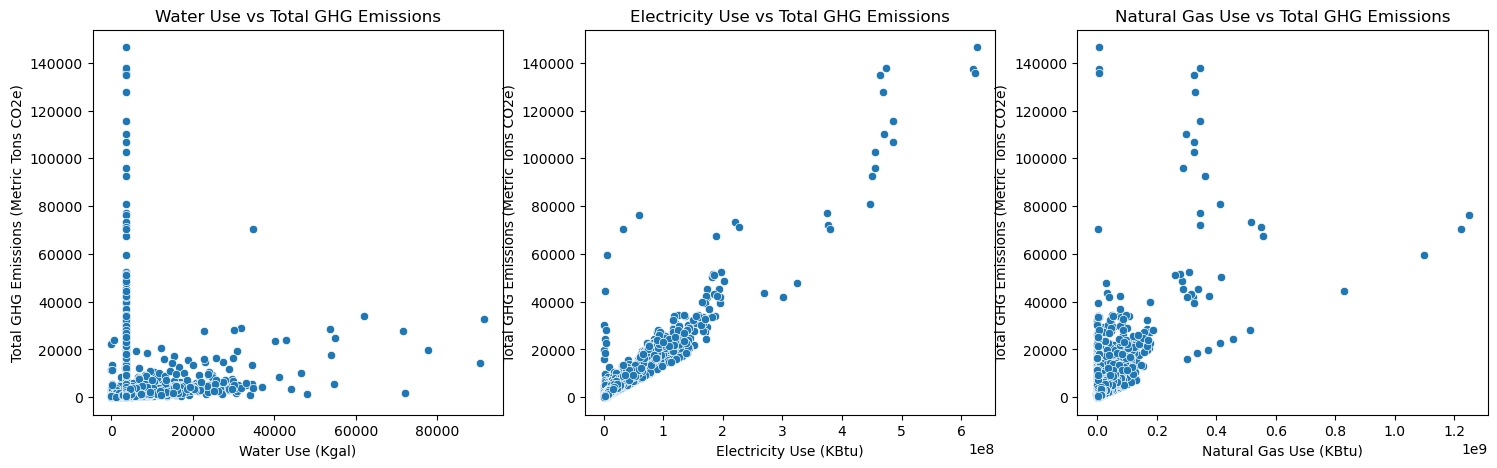

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(x='water_use_kgal', y='total_ghg_emissions_metric_tons_co2e', data=merged_data_cleaned, ax=axes[0])
axes[0].set_title('Water Use vs Total GHG Emissions')
axes[0].set_xlabel('Water Use (Kgal)')
axes[0].set_ylabel('Total GHG Emissions (Metric Tons CO2e)')

sns.scatterplot(x='electricity_use_kbtu', y='total_ghg_emissions_metric_tons_co2e', data=merged_data_cleaned, ax=axes[1])
axes[1].set_title('Electricity Use vs Total GHG Emissions')
axes[1].set_xlabel('Electricity Use (KBtu)')
axes[1].set_ylabel('Total GHG Emissions (Metric Tons CO2e)')

sns.scatterplot(x='natural_gas_use_kbtu', y='total_ghg_emissions_metric_tons_co2e', data=merged_data_cleaned, ax=axes[2])
axes[2].set_title('Natural Gas Use vs Total GHG Emissions')
axes[2].set_xlabel('Natural Gas Use (KBtu)')
axes[2].set_ylabel('Total GHG Emissions (Metric Tons CO2e)')


plt.show()

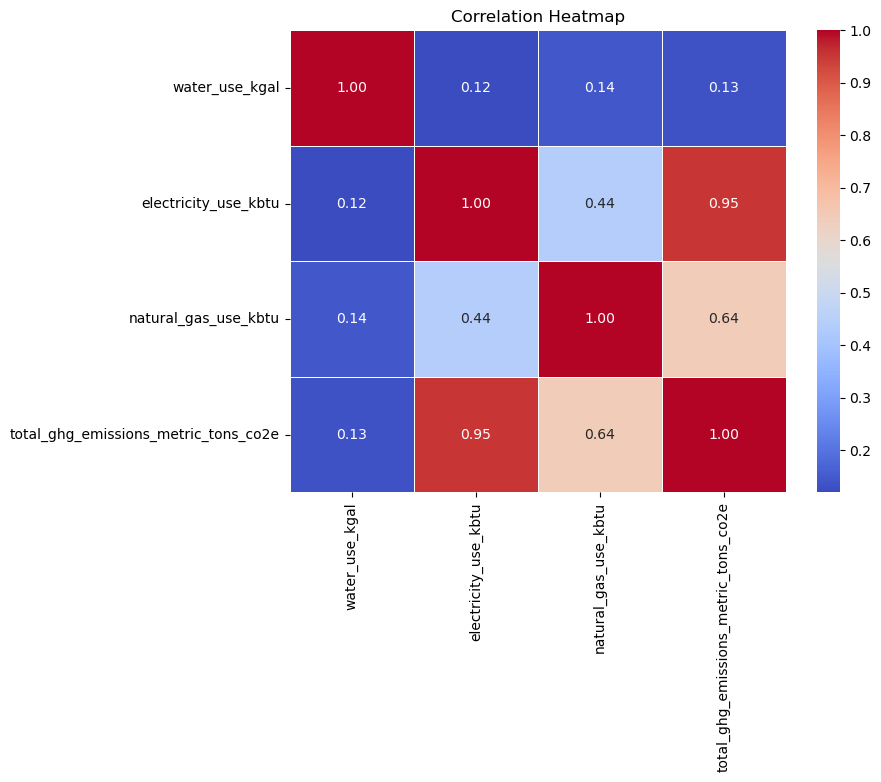

In [16]:
correlation_matrix = merged_data_cleaned[['water_use_kgal', 'electricity_use_kbtu', 'natural_gas_use_kbtu', 'total_ghg_emissions_metric_tons_co2e']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()